<a href="https://colab.research.google.com/github/kay-kay-t/CodingDojo/blob/main/Copy_of_Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Source of data
[Kaggle](https://www.kaggle.com/prokaggler/video-popularity-prediction)

# Brief description of data

One of datasets from Kaggle, that has different features of video. I can make some predictions on different features based on other features video has. For exaple, I can make  prediction on how many likes video can get or how likely it will have a partner.

* compid: Unique ID 
* adblocked: Indicates whether or not ads are blocked on the video
* embed: Indicates whether or not the video can be embedded
* ratio: The aspect ratio of the video
* duration: Duration of the video (in seconds)
* language: Language used in the video (encoded)
* partner: Indicates whether the video is certified by the partner/sponsor
* partneractive: Indicates whether the partner/sponsor is still active 
* nlikes: The number of likes the video has
* ntags: The number of tags in the video nformats: The number of streaming 
* formats available for the video
* dayofweek: The day of week when the video was published
* hour: The hour when the video was published (24-hour time format)

In [103]:
# Imports (for now)
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

## Dataset 1: Video content prediction

In [104]:
# Load data 
df = pd.read_csv('/content/drive/MyDrive/Data/public_meta_df.csv')
df.head()

,comp_id,ad_blocked,embed,ratio,duration,language,partner,partner_active,n_likes,n_tags,n_formats,dayofweek,hour
0,3001,False,True,1.33333,1675,2,False,False,0,10,2,2,3
1,3002,False,True,1.33333,1479,2,False,False,0,10,2,2,3
2,3003,False,True,1.33333,1505,2,False,False,0,10,2,2,3
3,3004,False,True,1.77778,50,2,True,True,1,6,5,2,3
4,3005,False,True,1.33333,1543,2,False,False,0,6,2,2,3


In [105]:
df['n_likes'].value_counts()

0    921
1     47
2     12
3      5
6      1
Name: n_likes, dtype: int64

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   comp_id         986 non-null    int64  
 1   ad_blocked      986 non-null    bool   
 2   embed           986 non-null    bool   
 3   ratio           986 non-null    float64
 4   duration        986 non-null    int64  
 5   language        986 non-null    int64  
 6   partner         986 non-null    bool   
 7   partner_active  986 non-null    bool   
 8   n_likes         986 non-null    int64  
 9   n_tags          986 non-null    int64  
 10  n_formats       986 non-null    int64  
 11  dayofweek       986 non-null    int64  
 12  hour            986 non-null    int64  
dtypes: bool(4), float64(1), int64(8)
memory usage: 73.3 KB


In [107]:
df.shape

(986, 13)

In [108]:
# Checking if there any duplicates
df.duplicated().any()

False

In [109]:
# Checking for missing values
df.isnull().sum()

comp_id           0
ad_blocked        0
embed             0
ratio             0
duration          0
language          0
partner           0
partner_active    0
n_likes           0
n_tags            0
n_formats         0
dayofweek         0
hour              0
dtype: int64

In [110]:
# Using for loop to check all data frame for inconsistent values
for col in df.columns:
    print(df[col].value_counts())

3986    1
3339    1
3337    1
3336    1
3335    1
       ..
3653    1
3652    1
3651    1
3650    1
3001    1
Name: comp_id, Length: 986, dtype: int64
False    986
Name: ad_blocked, dtype: int64
True     952
False     34
Name: embed, dtype: int64
1.77778    399
1.33333    300
1.72414     57
1.76471     37
1.22222     31
1.76667     29
1.25000     16
2.28571     14
1.48148     11
1.73913      9
1.48837      9
1.77273      7
1.80000      7
1.76000      6
1.81818      6
1.60000      6
1.73077      4
2.46154      4
1.50000      4
2.35294      3
1.46667      3
1.00000      2
1.52381      2
1.34091      2
1.35714      2
1.79412      2
1.74194      1
1.34783      1
1.31667      1
1.72973      1
1.31579      1
1.78261      1
1.30769      1
1.78571      1
1.18889      1
1.45455      1
1.75000      1
1.51111      1
1.30000      1
1.34483      1
Name: ratio, dtype: int64
2343    13
2342    10
44       8
86       8
41       8
        ..
485      1
486      1
1511     1
488      1
1039     1
Name: 

In [111]:
# Looks likie we can drop ad_blocked as well sinhce they are all False, so it would not have any impact on likes
df['ad_blocked'].value_counts()

False    986
Name: ad_blocked, dtype: int64

In [112]:
# I think we can drop partner_active column as well
df.drop(columns=['partner_active', 'ad_blocked'], inplace=True)
df.head()

,comp_id,embed,ratio,duration,language,partner,n_likes,n_tags,n_formats,dayofweek,hour
0,3001,True,1.33333,1675,2,False,0,10,2,2,3
1,3002,True,1.33333,1479,2,False,0,10,2,2,3
2,3003,True,1.33333,1505,2,False,0,10,2,2,3
3,3004,True,1.77778,50,2,True,1,6,5,2,3
4,3005,True,1.33333,1543,2,False,0,6,2,2,3


In [116]:
# Binarize target column
df['n_likes'] = df['n_likes'].replace([2, 3, 6], 1)
df

,comp_id,embed,ratio,duration,language,partner,n_likes,n_tags,n_formats,dayofweek,hour
0,3001,1,1.33333,1675,2,0,0,10,2,2,3
1,3002,1,1.33333,1479,2,0,0,10,2,2,3
2,3003,1,1.33333,1505,2,0,0,10,2,2,3
3,3004,1,1.77778,50,2,1,1,6,5,2,3
4,3005,1,1.33333,1543,2,0,0,6,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...
981,3982,1,1.77778,46,3,1,0,2,4,6,13
982,3983,1,1.33333,91,2,0,0,1,2,6,13
983,3984,1,1.77778,72,3,1,0,2,4,6,13
984,3985,1,1.33333,82,7,0,0,9,3,6,13


In [117]:
# Binarize other bool values in columns
a = df['embed'].astype(int)
b = df['partner'].astype(int)
df['embed'] = a
df['partner'] = b
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   comp_id    986 non-null    int64  
 1   embed      986 non-null    int64  
 2   ratio      986 non-null    float64
 3   duration   986 non-null    int64  
 4   language   986 non-null    int64  
 5   partner    986 non-null    int64  
 6   n_likes    986 non-null    int64  
 7   n_tags     986 non-null    int64  
 8   n_formats  986 non-null    int64  
 9   dayofweek  986 non-null    int64  
 10  hour       986 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 84.9 KB


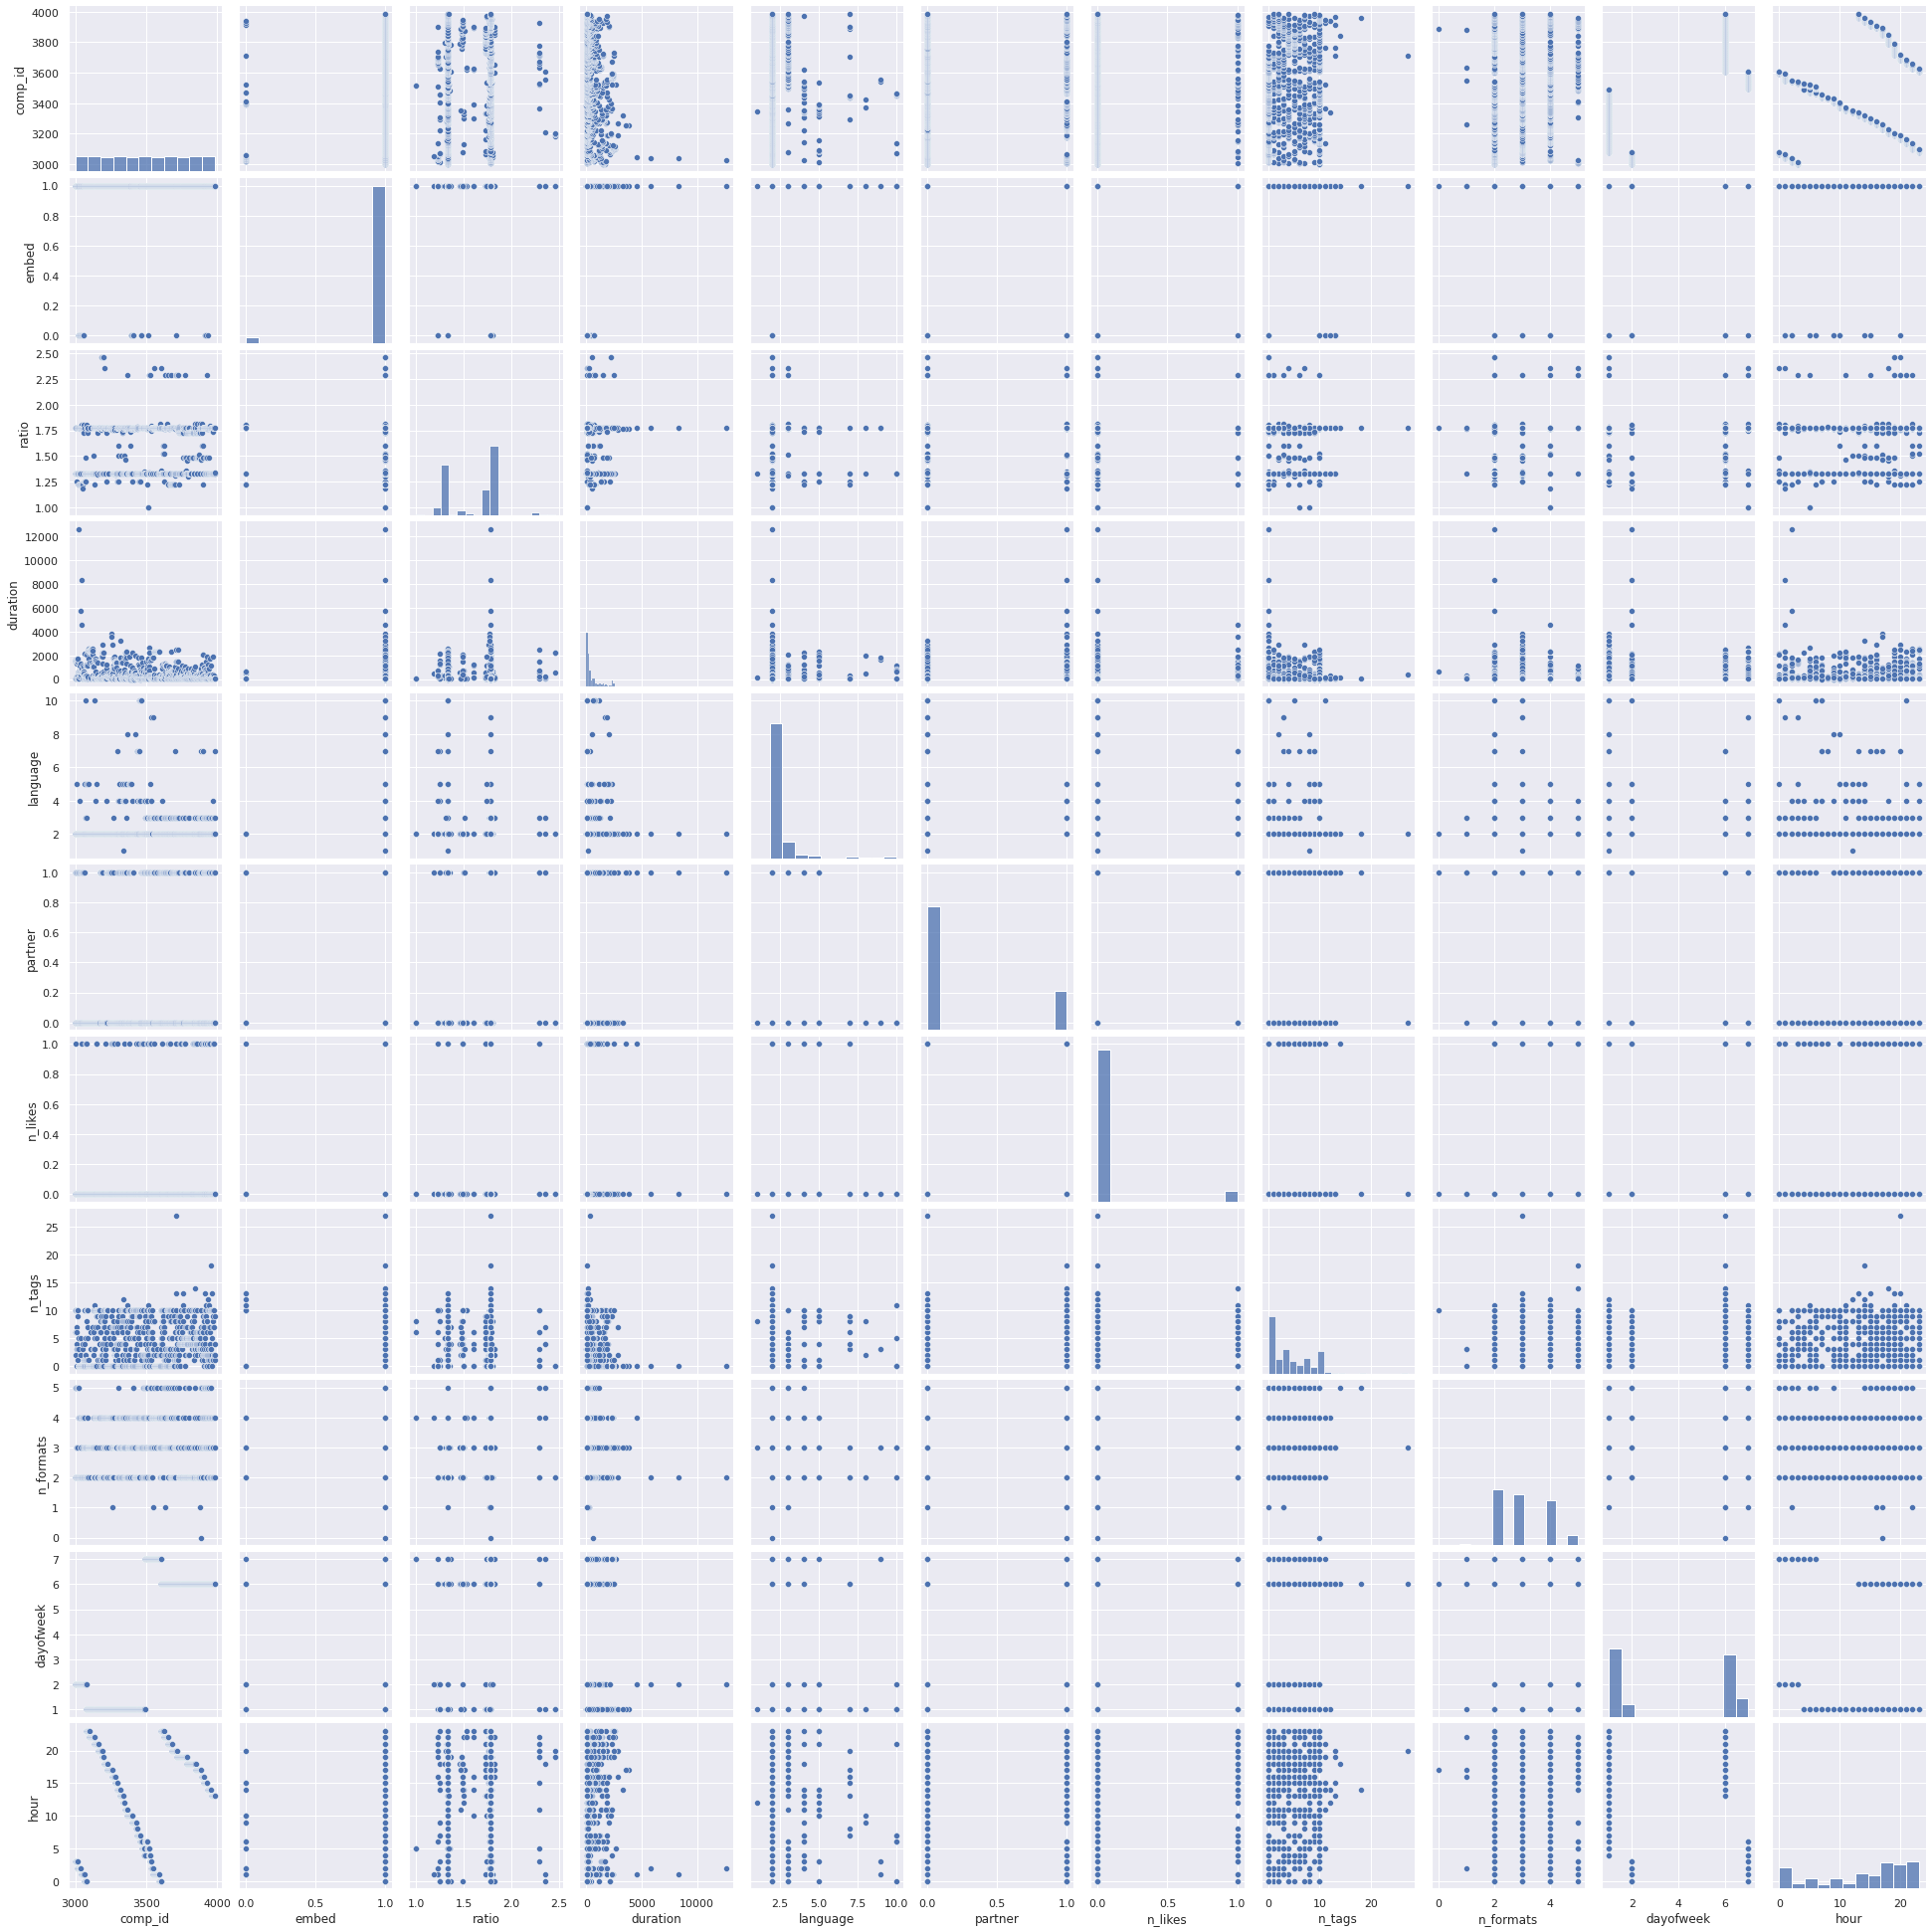

In [135]:
sns.pairplot(df)
 
 

Based on visualization above we can see what corelations are there in our dataset. Also we see data distribution.

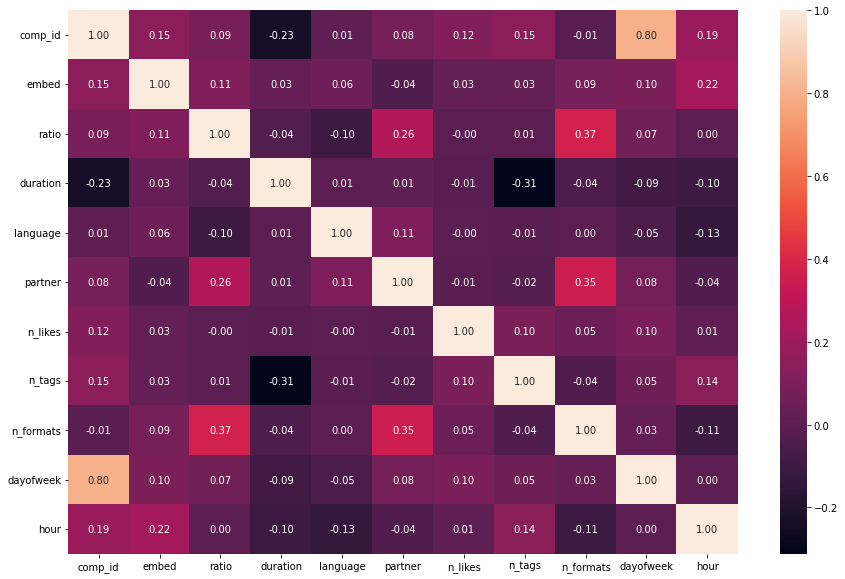

In [120]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, fmt='.02f', ax=ax)

This heatmap shows that n_tags has the most impact on n_likes after comp_id. Duration strongly correlated with n_tags and comp_id.

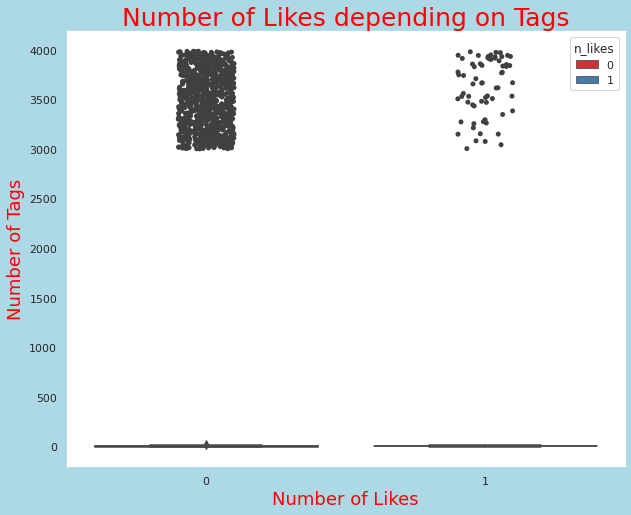

In [132]:
# Making boxplot to see if there's so9me outliers
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(10,8), 'axes.facecolor':'white', 'figure.facecolor':'lightblue'})
ax = sns.boxplot(x = 'n_likes', y = 'n_tags', data = df,
            hue='n_likes',
            palette='Set1',
            dodge=False);
ax = sns.stripplot(x="n_likes", y="comp_id", data=df, color=".25")  

plt.grid()

plt.xlabel('Number of Likes', color='Red', fontsize=18)
plt.ylabel('Number of Tags', color='Red', fontsize=18)
plt.title('Number of Likes depending on Tags', color= 'Red', fontsize=25);


plt.show()

Per visualization above, most of values are concentrated between 3000 and 4000 tags and there's some with 0 tags, which could possibly be outliers.